In [2]:
import tensorflow as tf
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

In [3]:
drive.mount("/content/sample_data/drive")

Mounted at /content/sample_data/drive


In [4]:
with zipfile.ZipFile('/content/sample_data/drive/My Drive/archive.zip', 'r') as zipObj:
   zipObj.extractall('/content/sample_data')

In [5]:
path = '/content/sample_data/landscape Images'
color_image_list = os.listdir(os.path.join(path, 'color'))
gray_image_list = os.listdir(os.path.join(path, 'gray'))
color_images = []
gray_images = []
for image in color_image_list:
    img = plt.imread(os.path.join(path, 'color', image))
    color_images.append(cv2.resize(img, (150, 150))/255)
for image in color_image_list:
    img = plt.imread(os.path.join(path, 'gray', image))
    gray_images.append(cv2.resize(img, (150, 150))/255)
gray_images = np.asarray(gray_images)
color_images = np.asarray(color_images)

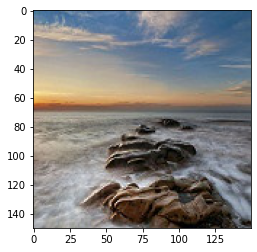

In [6]:
plt.imshow(color_images[2])

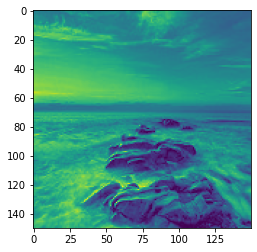

In [7]:
plt.imshow(gray_images[2])

In [8]:
im_shape = (150, 150, 1)
inp = tf.keras.layers.Input(shape=im_shape)

h1 = tf.keras.layers.Conv2D(filters = 256, kernel_size =(3, 3), activation='relu', padding='same')(inp)
m1 = tf.keras.layers.MaxPooling2D(padding='same', strides = (3,3))(h1)
h2 = tf.keras.layers.Conv2D(filters = 128, kernel_size =(3, 3), activation='relu', padding='same')(m1)
m2 = tf.keras.layers.MaxPooling2D(padding='same', strides = (2,2))(h2)
# f = tf.keras.layers.Flatten()(m2)
# d1 = tf.keras.layers.Dense(25*25*4)(f)
# drop1 = tf.keras.layers.Dropout(0.2)(d1)
# d2 = tf.keras.layers.Dense(25*25)(drop1)

# d3 = tf.keras.layers.Dense(25*25*64)(d2)
# drop2 = tf.keras.layers.Dropout(0.5)(d3)
# rs = tf.keras.layers.Reshape((25, 25, 64))(drop2)
h3 = tf.keras.layers.Conv2D(filters = 128, kernel_size =(3, 3), activation='relu', padding='same')(m2)
u3 = tf.keras.layers.UpSampling2D(size=(3,3))(h3)
h4 = tf.keras.layers.Conv2D(filters = 256, kernel_size =(3, 3), activation='relu', padding='same')(u3)
u4 = tf.keras.layers.UpSampling2D(size=(2,2))(h4)
o = tf.keras.layers.Conv2D(filters =3, kernel_size =(3, 3), activation='sigmoid', padding='same')(u4)

model = tf.keras.models.Model(inputs=inp, outputs=o)

In [11]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 256)     2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 75, 75, 128)       0     

In [10]:
history = model.fit(gray_images, color_images, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
39/39 [==============================] - 116s 2s/step - loss: 0.6355 - val_loss: 0.5629
Epoch 2/15
39/39 [==============================] - 54s 1s/step - loss: 0.5643 - val_loss: 0.5564
Epoch 3/15
39/39 [==============================] - 54s 1s/step - loss: 0.5573 - val_loss: 0.5522
Epoch 4/15
39/39 [==============================] - 54s 1s/step - loss: 0.5553 - val_loss: 0.5523
Epoch 5/15
39/39 [==============================] - 54s 1s/step - loss: 0.5547 - val_loss: 0.5481
Epoch 6/15
39/39 [==============================] - 54s 1s/step - loss: 0.5514 - val_loss: 0.5469
Epoch 7/15
39/39 [==============================] - 54s 1s/step - loss: 0.5492 - val_loss: 0.5470
Epoch 8/15
39/39 [==============================] - 54s 1s/step - loss: 0.5503 - val_loss: 0.5461
Epoch 9/15
39/39 [==============================] - 54s 1s/step - loss: 0.5492 - val_loss: 0.5472
Epoch 10/15
39/39 [==============================] - 54s 1s/step - loss: 0.5473 - val_loss: 0.5453
Epoch 11/15
39/39 

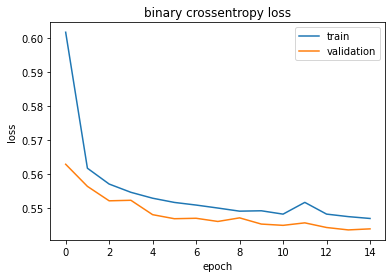

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('binary crossentropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

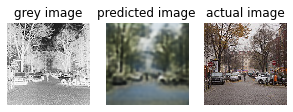

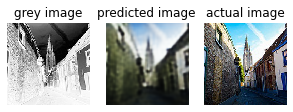

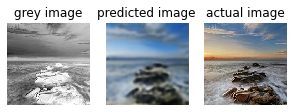

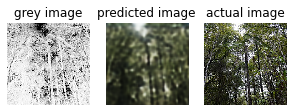

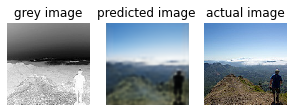

In [14]:
for image in range(0,5):
    fig, ax = plt.subplots(1, 3 , figsize=(5, 5))
    ax[1].imshow(model.predict(gray_images[image:image+1])[0])
    ax[1].axis('off')
    ax[1].set_title("predicted image")
    ax[0].imshow(gray_images[image], interpolation='nearest', cmap="Greys")
    ax[0].axis('off')
    ax[0].set_title("grey image")
    ax[2].imshow(color_images[image], interpolation='nearest')
    ax[2].set_title("actual image")
    ax[2].axis('off')